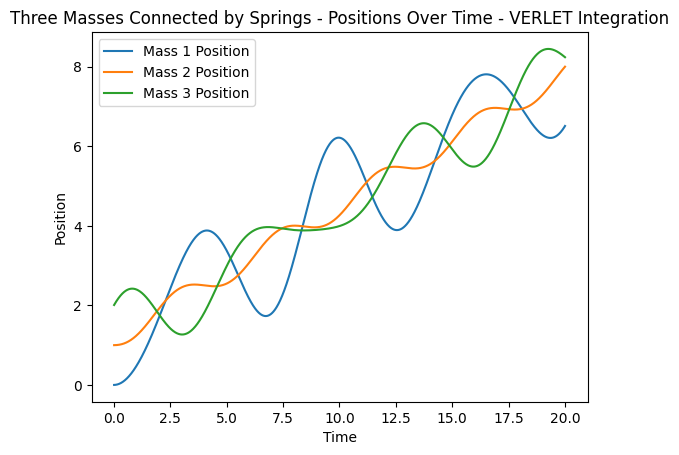

TypeError: 'bool' object is not callable

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# constants
k = 1
m = 1
m1 = m
m2 = 3 * m
m3 = 2 * m
k1 = k
k2 = 2 * k
# initial conditions
x1_0 = 0; x2_0 = 1; x3_0 = 2
v1_0 = 0; v2_0 = 0; v3_0 = 1

x1 = x1_0
x2 = x2_0  
x3 = x3_0
v1 = v1_0
v2 = v2_0
v3 = v3_0
# time parameters
t = 0
dt = 0.01
# VERLET INTEGRATION
a1 = k1 * (x2-x1) / m1
a2 = k2 * (x3-x2) / m2 + k1 * (x1-x2) / m2
a3 = k2 * (x2-x3) / m3
x1_list  = []
x2_list  = []
x3_list  = []
v1_list  = []
v2_list  = []
v3_list  = []
time_list = []
while t < 20:
    x1_new = x1 + v1 * dt + 0.5 * a1 * dt**2
    x2_new = x2 + v2 * dt + 0.5 * a2 * dt**2
    x3_new = x3 + v3 * dt + 0.5 * a3 * dt**2
    a1_new = k1 * (x2_new - x1_new) / m1
    a2_new = k2 * (x3_new - x2_new) / m2 + k1 * (x1_new - x2_new) / m2
    a3_new = k2 * (x2_new - x3_new) / m3
    v1_new = v1 + 0.5 * (a1 + a1_new) * dt
    v2_new = v2 + 0.5 * (a2 + a2_new) * dt
    v3_new = v3 + 0.5 * (a3 + a3_new) * dt
    x1, x2, x3 = x1_new, x2_new, x3_new
    v1, v2, v3 = v1_new, v2_new, v3_new
    a1, a2, a3 = a1_new, a2_new, a3_new
    t += dt
    x1_list.append(x1)
    x2_list.append(x2)
    x3_list.append(x3)
    v1_list.append(v1)
    v2_list.append(v2)
    v3_list.append(v3)
    time_list.append(t)
# Plotting Position Versus Time
plt.plot(time_list, x1_list, label='Mass 1 Position')
plt.plot(time_list, x2_list, label='Mass 2 Position')
plt.plot(time_list, x3_list, label='Mass 3 Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Three Masses Connected by Springs - Positions Over Time - VERLET Integration')
plt.legend()
plt.show()
plt.clf()
plt.grid(True)
# lotting Velocities Versus Time
plt.plot(time_list, v1_list, label='Mass 1 Velocity')
plt.plot(time_list, v2_list, label='Mass 2 Velocity')
plt.plot(time_list, v3_list, label='Mass 3 Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Three Masses Connected by Springs - Velocities Over Time - VERLET Integration')
plt.legend()
plt.show()




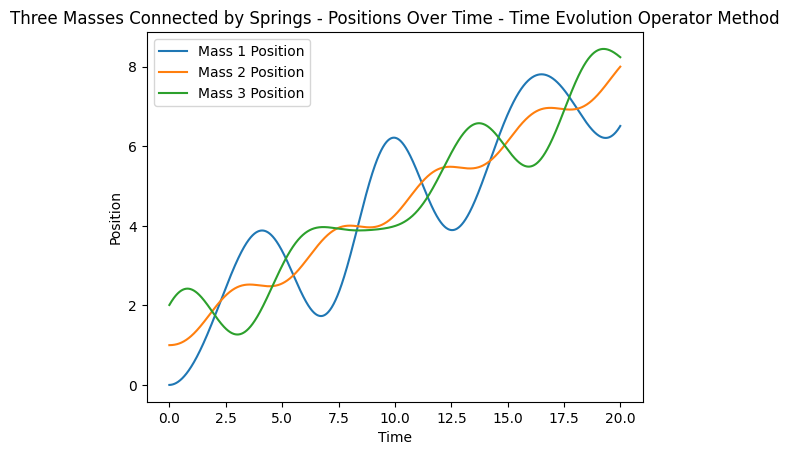

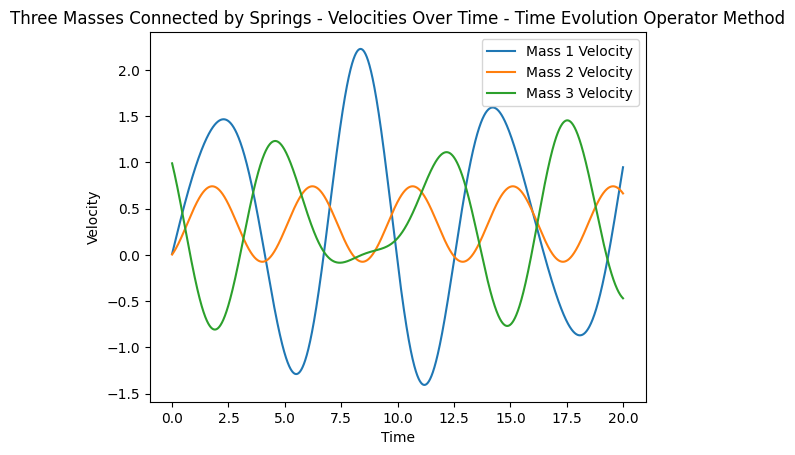

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm # this is for time evolution operator method

# constants
k = 1
m = 1
m1 = m
m2 = 3 * m
m3 = 2 * m
k1 = k
k2 = 2 * k
# initial conditions
x1_0 = 0; x2_0 = 1; x3_0 = 2
v1_0 = 0; v2_0 = 0; v3_0 = 1

x1 = x1_0
x2 = x2_0  
x3 = x3_0
v1 = v1_0
v2 = v2_0
v3 = v3_0
# time parameters
t = 0
dt = 0.01
# Initializing lists to store positions, velocities, and time
x1_list  = []
x2_list  = []
x3_list  = []
v1_list  = []
v2_list  = []
v3_list  = []
time_list = []

# TIME EVOLUTION OPERATOR METHOD
# State vector
r = np.array([x1, x2, x3, v1, v2, v3])
# System matrix
A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [-(k1/m1), (k1/m1), 0, 0, 0, 0],
              [(k1/m2), -(k1+k2)/m2, (k2/m2), 0, 0, 0],
              [0, (k2/m3), -(k2/m3), 0, 0, 0]])
# Time evolution operator

U = expm(A*dt)  
while t < 20:
    r = U @ r
   
    x1_list.append(r[0])
    x2_list.append(r[1])
    x3_list.append(r[2])
    v1_list.append(r[3])
    v2_list.append(r[4])
    v3_list.append(r[5])
    time_list.append(t)
    t += dt
# Plotting Position Versus Time
plt.plot(time_list, x1_list, label='Mass 1 Position')
plt.plot(time_list, x2_list, label='Mass 2 Position')
plt.plot(time_list, x3_list, label='Mass 3 Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Three Masses Connected by Springs - Positions Over Time - Time Evolution Operator Method')
plt.legend()
plt.show()
# Plotting Velocities Versus Time
plt.plot(time_list, v1_list, label='Mass 1 Velocity')
plt.plot(time_list, v2_list, label='Mass 2 Velocity')
plt.plot(time_list, v3_list, label='Mass 3 Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Three Masses Connected by Springs - Velocities Over Time - Time Evolution Operator Method')
plt.legend()
plt.show()